In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import re
import numpy as np

# Data load

In [2]:
root = Path('/tmp/working/data/lpp_batch1')
fn_pattern = r'lpp_(hc|mdd)_(\d{4})_(positive|neutral).csv'
type_map1 = {
    'hc': 1,  # health control
    'mdd': 0  # depressed
}
type_map2 = {
    'positive': 1,
    'neutral': 0
}
keys = list()  # to build multi-index
dfs = list()  # a list of dataframes to be concatenated to final dataframes
shapes = list()  # keep a record of the shapes of all loaded data files

for f in root.iterdir():
    name = f.name
    m = re.match(fn_pattern, name)
    if m is None:
        print('File not matching pattern: {}'.format(name))
        continue
    code = m.group(2)
    health = type_map1[m.group(1)] 
    type_ = type_map2[m.group(3)]
    keys.append((health, type_, code))
    df = pd.read_csv(f, delim_whitespace=False).T  # read a single csv file into a dataframe
    df.index.set_names(['channel'], inplace=True)  # give a name to the index
    dfs.append(df)
    shapes.append(df.shape)

# Concatenate individual data frames into a big one, so it will be easier to work with in the future
df = pd.concat(dfs, keys=keys, names=['healthy', 'positive/neutral', 'id'])
df.head()

File not matching pattern: .ipynb_checkpoints


0        1        2        3     \
healthy positive/neutral id   channel                                       
1       1                1008 CP1     -0.99385 -0.93280 -0.86570 -0.79730   
                              CP2     -0.70160 -0.65230 -0.59420 -0.53320   
                              Cz      -1.19980 -1.09405 -0.97915 -0.86275   
                              FC1     -1.57175 -1.49580 -1.41680 -1.34185   
                              FC2     -1.18825 -1.10490 -1.01865 -0.93725   

                                          4        5        6       7     \
healthy positive/neutral id   channel                                      
1       1                1008 CP1     -0.73015 -0.66560 -0.60605 -0.5559   
                              CP2     -0.47365 -0.41935 -0.37465 -0.3450   
                              Cz      -0.75070 -0.64775 -0.55915 -0.4909   
                              FC1     -1.27540 -1.22010 -1.17860 -1.1540   
                              FC2     -0.86610 -0.80845 -0.76745 -0.7469   

                                          8        9     ...     1390  \
healthy positive/neutral id   channel                    ...            
1       1                1008 CP1     -0.52020 -0.50195  ...  0.17015   
                              CP2     -0.33540 -0.34820  ... -0.15650   
                              Cz      -0.44880 -0.43590  ... -0.64220   
                              FC1     -1.14905 -1.16435  ... -0.94445   
                              FC2     -0.74995 -0.77710  ... -0.95545   

                                          1391     1392     1393     1394  \
healthy positive/neutral id   channel                                       
1       1                1008 CP1      0.11950  0.05875 -0.00735 -0.07550   
                              CP2     -0.19680 -0.24285 -0.29055 -0.33705   
                              Cz      -0.72250 -0.80670 -0.88930 -0.96595   
                              FC1     -0.98825 -1.03685 -1.08495 -1.12835   
                              FC2     -1.04375 -1.13220 -1.21485 -1.28670   

                                          1395     1396     1397     1398  \
healthy positive/neutral id   channel                                       
1       1                1008 CP1     -0.14355 -0.21050 -0.27625 -0.34030   
                              CP2     -0.38060 -0.42045 -0.45620 -0.48755   
                              Cz      -1.03370 -1.09085 -1.13650 -1.17020   
                              FC1     -1.16415 -1.19070 -1.20725 -1.21320   
                              FC2     -1.34410 -1.38450 -1.40675 -1.40990   

                                          1399  
healthy positive/neutral id   channel           
1       1                1008 CP1     -0.40085  
                              CP2     -0.51320  
                              Cz      -1.19095  
                              FC1     -1.20720  
                              FC2     -1.39270  

[5 rows x 1400 columns]

Data frame shape: (520, 1400)
Total files loaded: 40


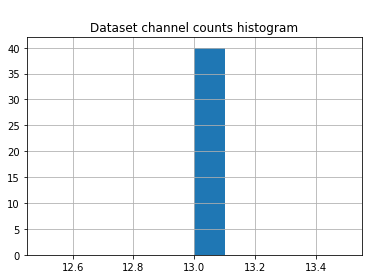

In [3]:
# Print some statistics
print('Data frame shape: {}'.format(df.shape))
print('Total files loaded: {}'.format(len(dfs)))

# Each csv file carries various amount of channels, check the channel statistics
chl_counts = [c for c, _ in shapes]
chl_counts = pd.Series(chl_counts)
plt.title('\nDataset channel counts histogram')
chl_counts.hist()

In [4]:
# save the data
save_path = Path('/tmp/working/data/processed/lpp_step_1_load.pkl')
pickle.dump(df, save_path.open('wb'))

# Data explore

In [5]:
ids = df.index.levels[2]  # find all ids
print('Total of {} participants'.format(len(ids)))
print('{} Healthy control'.format(len([i for i in ids if int(i) < 2000])))
print('{} MDD'.format(len([i for i in ids if int(i) >= 2000])))
print('All participant IDs:')
print(' '.join(map(str, ids)))

Total of 20 participants
10 Healthy control
10 MDD
All participant IDs:
1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


Text(0.5, 1.0, 'One MDD patient, Cz channel')

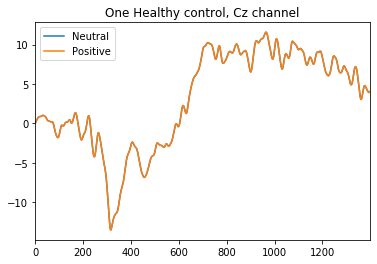

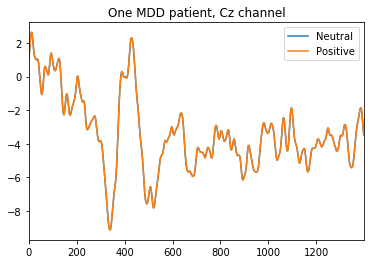

In [6]:
df.loc[(slice(None), slice(None), '1003', 'Cz'), :].T.plot()
plt.legend(['Neutral', 'Positive'])
plt.title('One Healthy control, Cz channel')
df.loc[(slice(None), slice(None), '2003', 'Cz'), :].T.plot()
plt.legend(['Neutral', 'Positive'])
plt.title('One MDD patient, Cz channel')

Text(0.5, 1.0, 'All healthy control positive Cz channel')

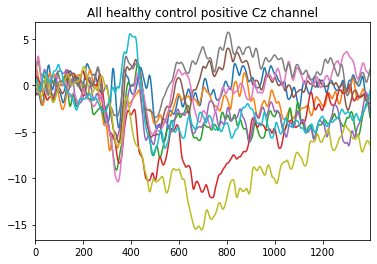

In [7]:
df.loc[(0, 1, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All healthy control positive Cz channel')

Text(0.5, 1.0, 'All healthy control neutral Cz channel')

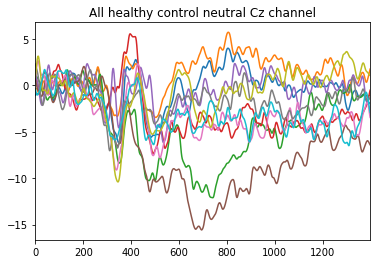

In [8]:
df.loc[(0, 0, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All healthy control neutral Cz channel')

Text(0.5, 1.0, 'All MDD patients positive Cz channel')

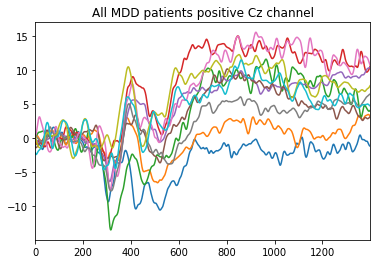

In [9]:
df.loc[(1, 1, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All MDD patients positive Cz channel')

Text(0.5, 1.0, 'All MDD patients neutral Cz channel')

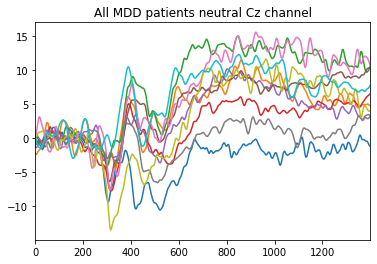

In [10]:
df.loc[(1, 0, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All MDD patients neutral Cz channel')

In [11]:
print('The count of missing values: {}'.format(
    df.isnull().values.sum()
))

The count of missing values: 0


In [12]:
all_channels = set(df.index.levels[3])
incomplete_channels = set()
print('All channels:', ' '.join(sorted(list(all_channels))))
for sid in df.index.levels[2]:
    sub_df = df.xs(sid, level=2)
    channels = set(sub_df.reset_index(level=2)['channel'])
    missing = all_channels - channels
    incomplete_channels = incomplete_channels | missing
print('Channels without missing data:', ' '.join(sorted(list(all_channels - incomplete_channels))))
print('Channels with missing data:', ' '.join(sorted(list(incomplete_channels))))

All channels: CP1 CP2 Cz FC1 FC2 FCz Fp1 Fp2 Fz O1 O2 Oz Pz
Channels without missing data: CP1 CP2 Cz FC1 FC2 FCz Fp1 Fp2 Fz O1 O2 Oz Pz
Channels with missing data: 


## Check common patient ids compared to RewP dataset

In [13]:
rewp_df_file = Path('/tmp/working/data/processed/rewp_step_1_load.pkl')
rewp_df = pickle.load(rewp_df_file.open('rb'))

In [14]:
old_ids = rewp_df.index.levels[2]
diff_ids = (set(ids) - set(old_ids)).union (set(old_ids) - set(ids))
print('IDs not in common')
print(' '.join(map(str, diff_ids)))
common_ids = set(ids).intersection(old_ids)
print('IDs in common')
print(' '.join(common_ids))

IDs not in common

IDs in common
2003 1004 1008 2008 1002 1007 2004 1000 1006 1001 2006 2002 2001 2007 1009 2005 2000 2009 1003 1005
